In [1]:
drive_path = 'c:/'
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
from scipy.stats import anderson_ksamp
from scipy.stats import kruskal
from scipy.stats import variation
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from scipy.stats import nanmean
from scipy.stats import nanstd
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
filename='C:\Users\Annie\Documents\Data\Ca_Imaging\Analysis\\Odor_Panel\\Odor_Trials.csv'
trials=pd.read_csv(filename)

In [3]:
z='C:\Users\Annie\Documents\Data\Ca_Imaging\GoodFiles\\fullpeak_WL.csv'
peak=pd.read_csv(z)
s='C:\Users\Annie\Documents\Data\Ca_Imaging\GoodFiles\\fullsuccess_WI.csv'
success=pd.read_csv(s)

# Reliability vs Peak

In [4]:
melt_success=pd.melt(success,('Mouse','Group'),var_name='Odor',value_name='Reliability')
melt_peak=pd.melt(peak,('Mouse','Group'),var_name='Odor',value_name='Peak')

In [5]:
peak.head()

,Group,Mouse,IAA10,IAA01,AP,MS10,IAA05,Hexanal01,EB,MS01,PA,MS05,Blank,Hexanone,Hexanal10,THA,Hexanal05
0,Control,G PMT (1)_160321_1,0.099708,0.188597,0.036738,0.150474,0.034294,0.062999,-0.061840,0.015671,0.037389,0.169456,NaN,0.093353,0.069948,0.067358,0.124211
1,Control,G PMT (2)_160321_1,0.041676,0.188666,0.073576,0.074001,0.001814,0.014205,0.056893,-0.034636,-0.002271,0.139423,NaN,-0.026087,0.036447,0.095266,0.101018
2,Control,G PMT (3)_160321_1,0.287615,0.477065,0.058214,0.260675,0.127803,0.129928,0.153817,-0.044179,0.221412,0.095906,NaN,0.022945,0.263380,0.146676,0.293199
3,Control,G PMT (4)_160321_1,0.034975,0.248613,0.110235,0.071141,0.104363,0.104142,0.082859,0.146939,0.051386,0.157300,NaN,-0.057530,0.037260,0.094015,0.198974
4,Control,G PMT (5)_160321_1,0.309290,0.393188,0.116399,0.220858,0.240154,0.315627,0.694684,0.268299,0.203381,0.233311,NaN,-0.147715,0.145721,0.069755,0.538062


In [6]:
success_peak=pd.concat([melt_peak,melt_success.Reliability],axis=1)
control=success_peak[success_peak['Group']=='Control']
mint=success_peak[success_peak['Group']=='Mint']
hexanal=success_peak[success_peak['Group']=='Hexanal']

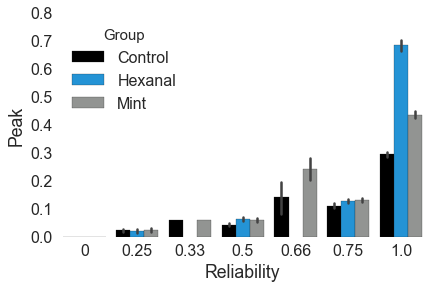

In [7]:
sns.set(style='white',palette="muted", color_codes=True);
sns.set_context("paper",font_scale=2);
ax=sns.barplot(x='Reliability',y='Peak',hue='Group',data=success_peak, palette=['black',sns.xkcd_rgb['azure'],sns.xkcd_rgb['grey']],hue_order=['Control','Hexanal','Mint']);

ax.set(xlabel='Reliability', ylabel='Peak')
ax.set_xticklabels([0,0.25,0.33,0.5,0.66,0.75,1.0])
sns.despine(left=True,bottom=True);
plt.tight_layout();

plt.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\Excitatory\Success_Peak.pdf")

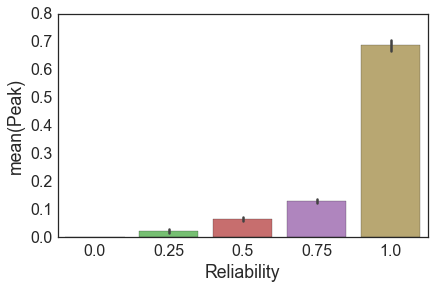

In [42]:
sns.set(style='white',palette="muted", color_codes=True);
sns.set_context("paper",font_scale=2);
sns.barplot(x='Reliability',y='Peak',data=hexanal);
# plt.ylim(0,5)
plt.tight_layout();

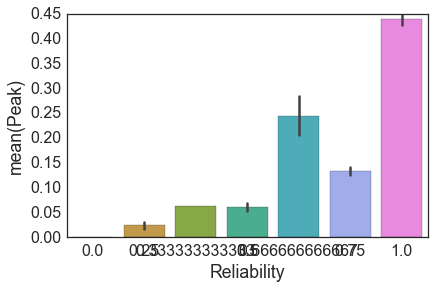

In [41]:
sns.set(style='white',palette="muted", color_codes=True);
sns.set_context("paper",font_scale=2);
sns.barplot(x='Reliability',y='Peak',data=mint);
plt.xl
# plt.ylim(0,5)
plt.tight_layout();

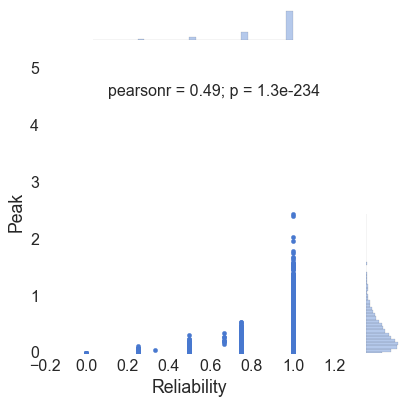

In [33]:
sns.set(style='white',palette="muted", color_codes=True);
sns.set_context("paper",font_scale=2);
sns.jointplot('Reliability','Peak',mint).set_axis_labels("Reliability", "Peak");
# sns.jointplot('Reliability','Peak',hexanal).set_axis_labels('Reliability','Peak');
sns.despine(left=True,bottom=True);
plt.ylim(0,5)
plt.tight_layout();

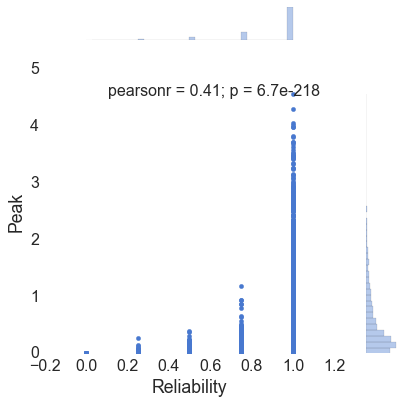

In [29]:
sns.set(style='white',palette="muted", color_codes=True);
sns.set_context("paper",font_scale=2);
sns.jointplot('Reliability','Peak',hexanal).set_axis_labels('Reliability','Peak');
sns.despine(left=True,bottom=True);
plt.ylim(0,5)
plt.tight_layout();

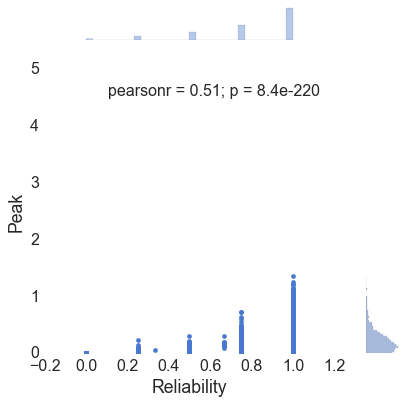

In [30]:
sns.set(style='white',palette="muted", color_codes=True);
sns.set_context("paper",font_scale=2);
sns.jointplot('Reliability','Peak',control).set_axis_labels('Reliability','Peak');
sns.despine(left=True,bottom=True);
plt.ylim(0,5)
plt.tight_layout();

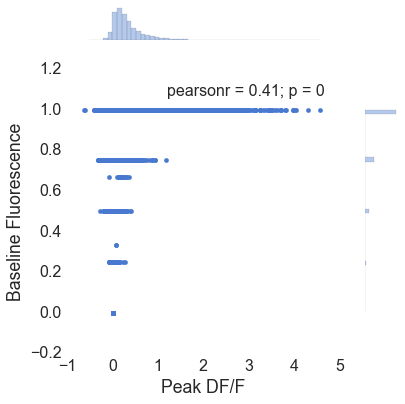

In [40]:
sns.set(style='white',palette="muted", color_codes=True);
sns.set_context("paper",font_scale=2);
sns.jointplot('Peak','Reliability',success_peak).set_axis_labels("Peak DF/F", "Baseline Fluorescence");
sns.despine(left=True,bottom=True);
plt.tight_layout();

# KMeans

In [8]:
import numpy as np
from kmodes import kmodes


ImportError: No module named kmodes

In [9]:
import kmodes

ImportError: No module named kmodes

In [ ]:

# random categorical data
data = np.random.choice(20, (100, 10))

km = kmodes.KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(data)

# Print the cluster centroids
print(km.cluster_centroids_)

In [85]:
c=peak[peak.Group=='Control'].ix[:,2:]

In [86]:
k=2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(c)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# Separating by sex

In [4]:
control=peak[peak['Group']=='Control']
mint=peak[peak['Group']=='Mint']
hexanal=peak[peak['Group']=='Hexanal']

In [16]:
# control.to_csv('C:\Users\Annie\Desktop\\Plasticity\\controlpeaks.csv')
# mint.to_csv('C:\Users\Annie\Desktop\\Plasticity\\mintpeaks.csv')
# hexanal.to_csv('C:\Users\Annie\Desktop\\Plasticity\\hexanalpeaks.csv')

In [5]:
c=pd.read_csv('C:\Users\Annie\Desktop\\Plasticity\\controlpeaks.csv')
m=pd.read_csv('C:\Users\Annie\Desktop\\Plasticity\\mintpeaks.csv')
h=pd.read_csv('C:\Users\Annie\Desktop\\Plasticity\\hexanalpeaks.csv')

In [6]:
c.head()

,Group,Mouse,Sex,IAA10,IAA01,AP,MS10,IAA05,Hexanal01,EB,MS01,PA,MS05,Hexanone,Hexanal10,THA,Hexanal05
0,Control,G PMT (1)_160421_1,F,0.261251,0.220532,0.078283,0.174363,0.078846,0.258040,0.224654,-0.015140,0.124194,0.116465,0.244783,0.258894,-0.002940,0.253119
1,Control,G PMT (2)_160421_1,F,0.034870,0.156095,0.002472,0.031428,0.088457,0.003294,-0.003833,-0.070036,0.069198,-0.008144,0.032720,-0.006190,-0.039989,0.122363
2,Control,G PMT (3)_160421_1,F,0.267157,0.138539,0.137004,0.170831,0.269743,0.077619,0.172468,0.206637,0.078242,0.055920,0.172709,0.229815,0.006948,0.266373
3,Control,G PMT (4)_160421_1,F,0.280240,0.269055,0.088021,0.209082,0.283791,0.371138,0.124611,0.178935,-0.000169,0.165357,0.338062,0.340071,-0.062722,0.347664
4,Control,G PMT (5)_160421_1,F,0.700963,0.532985,0.439966,0.464252,0.562895,0.827307,0.742206,0.312638,0.408257,0.426777,0.871130,0.729781,0.219649,0.726061


In [7]:
cmelt=pd.melt(c,('Group','Mouse','Sex'),var_name='Odor',value_name='Peak')
mmelt=pd.melt(m,('Group','Mouse','Sex'),var_name='Odor',value_name='Peak')
hmelt=pd.melt(h,('Group','Mouse','Sex'),var_name='Odor',value_name='Peak')

In [8]:
cmale=cmelt[cmelt.Sex=='M']
cfemale=cmelt[cmelt.Sex=='F']
mmale=mmelt[mmelt.Sex=='M']
mfemale=mmelt[mmelt.Sex=='F']
hmale=hmelt[hmelt.Sex=='M']
hfemale=hmelt[hmelt.Sex=='F']

In [9]:
# odor='Hexanal05'
# kruskal(cmale[cmale.Odor==odor],mmale[mmale.Odor==odor],hmale[hmale.Odor==odor])

C:\Users\Annie\Anaconda2\lib\site-packages\scipy\stats\stats.py:257: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


KruskalResult(statistic=32751.358102116363, pvalue=0.0)

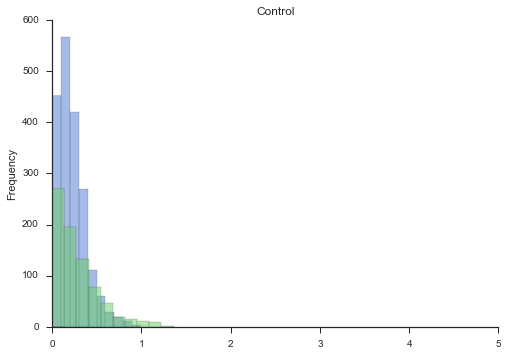

In [115]:
ecm=cmale[cmale.Peak>0]
ecf=cfemale[cfemale.Peak>0]
ecm.Peak.plot.hist(alpha=0.5);
ecf.Peak.plot.hist(alpha=0.5);
sns.set(style='white',palette="muted", color_codes=True);
sns.set_style("ticks")
plt.xlim(0,5);
plt.title('Control')
sns.despine()
plt.savefig("C:\Users\Annie\Desktop\Plasticity\Revision\SexDiff\Control.pdf")

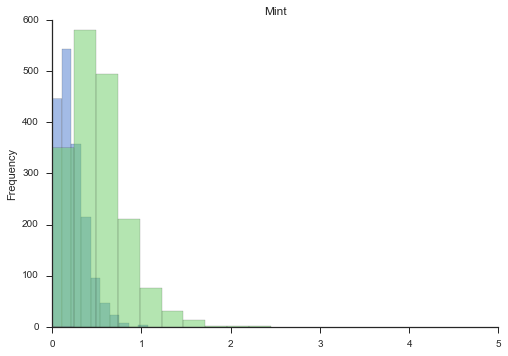

In [118]:
emm=mmale[mmale.Peak>0]
emf=mfemale[mfemale.Peak>0]
emm.Peak.plot.hist(alpha=0.5);
emf.Peak.plot.hist(alpha=0.5);
sns.set(style='white',palette="muted", color_codes=True);
sns.set_style("ticks")
plt.title('Mint')
plt.xlim(0,5);
sns.despine()
plt.savefig("C:\Users\Annie\Desktop\Plasticity\Revision\SexDiff\Mint.pdf")

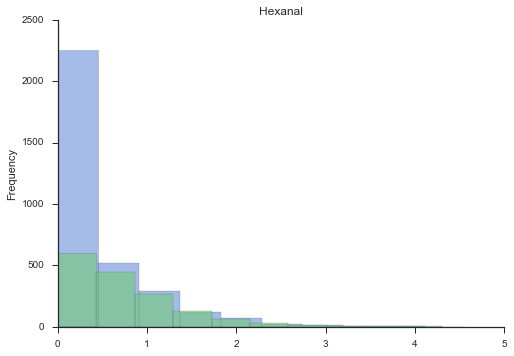

In [119]:
ehm=hmale[hmale.Peak>0]
ehf=hfemale[hfemale.Peak>0]
ehm.Peak.plot.hist(alpha=0.5);
ehf.Peak.plot.hist(alpha=0.5);
sns.set(style='white',palette="muted", color_codes=True);
sns.set_style("ticks")
plt.xlim(0,5);
plt.title('Hexanal')
sns.despine()
plt.savefig("C:\Users\Annie\Desktop\Plasticity\Revision\SexDiff\Hexanal.pdf")

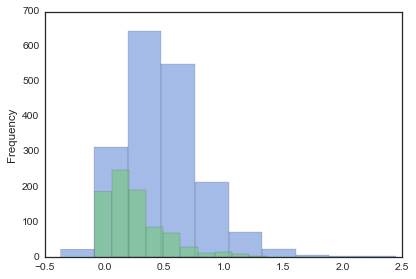

In [87]:
mfemale.Peak.plot.hist(alpha=0.5)
# mmale.Peak.plot.hist(alpha=1)
cfemale.Peak.plot.hist(alpha=0.5)
# cmale.Peak.plot.hist(alpha=0.5)
# hfemale.Peak.plot.hist(alpha=0.5)
# hmale.Peak.plot.hist(alpha=0.5)

In [61]:
kruskal(hmale.Peak,cmale.Peak.dropna())

KruskalResult(statistic=477.478614715064, pvalue=7.5577836561211752e-106)

In [ ]:
from scipy import 

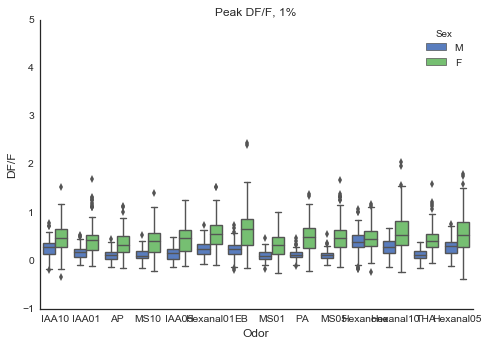

In [42]:
cat=('M','F')
sns.set(style="white", palette="muted", color_codes=True);
sns.set_context("paper", font_scale=1.3);
plt.figure(figsize=(7,5));
sns.boxplot(x='Odor',y='Peak',hue_order=cat,hue='Sex',data=mmelt);
# ax.legend_.remove()
sns.despine()
plt.ylabel('DF/F', fontsize=12);
plt.title('Peak DF/F, 1%', fontsize=12);
plt.xlabel('Odor', fontsize=12);
plt.ylim(-1,5)
plt.tight_layout()

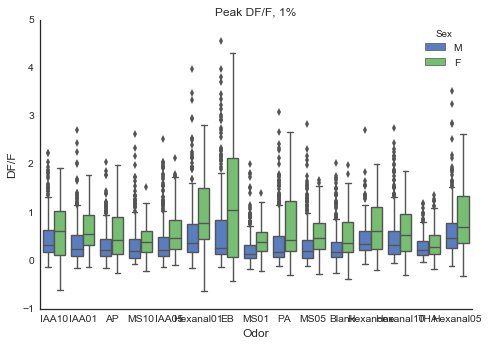

In [37]:
at=('M','F')
sns.set(style="white", palette="muted", color_codes=True);
sns.set_context("paper", font_scale=1.3);
plt.figure(figsize=(7,5));
sns.boxplot(x='Odor',y='Peak',hue_order=cat,hue='Sex',data=hmelt);
# ax.legend_.remove()
sns.despine()
plt.ylabel('DF/F', fontsize=12);
plt.title('Peak DF/F, 1%', fontsize=12);
plt.xlabel('Odor', fontsize=12);
plt.ylim(-1,5)
plt.tight_layout()

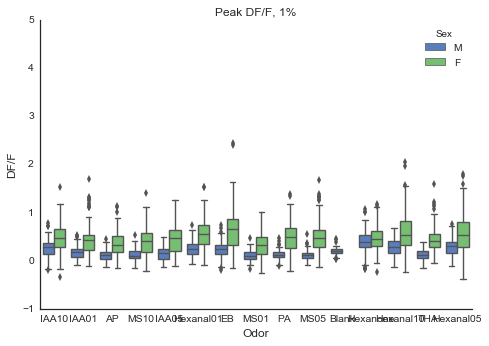

In [38]:
at=('M','F')
sns.set(style="white", palette="muted", color_codes=True);
sns.set_context("paper", font_scale=1.3);
plt.figure(figsize=(7,5));
sns.boxplot(x='Odor',y='Peak',hue_order=cat,hue='Sex',data=mmelt);
# ax.legend_.remove()
sns.despine()
plt.ylabel('DF/F', fontsize=12);
plt.title('Peak DF/F, 1%', fontsize=12);
plt.xlabel('Odor', fontsize=12);
plt.ylim(-1,5)
plt.tight_layout()

# Dendrogram

In [27]:
peak.head()

,Group,Mouse,IAA10,IAA01,AP,MS10,IAA05,Hexanal01,EB,MS01,PA,MS05,Blank,Hexanone,Hexanal10,THA,Hexanal05
0,Control,G PMT (1)_160321_1,0.099708,0.188597,0.036738,0.150474,0.034294,0.062999,-0.061840,0.015671,0.037389,0.169456,NaN,0.093353,0.069948,0.067358,0.124211
1,Control,G PMT (2)_160321_1,0.041676,0.188666,0.073576,0.074001,0.001814,0.014205,0.056893,-0.034636,-0.002271,0.139423,NaN,-0.026087,0.036447,0.095266,0.101018
2,Control,G PMT (3)_160321_1,0.287615,0.477065,0.058214,0.260675,0.127803,0.129928,0.153817,-0.044179,0.221412,0.095906,NaN,0.022945,0.263380,0.146676,0.293199
3,Control,G PMT (4)_160321_1,0.034975,0.248613,0.110235,0.071141,0.104363,0.104142,0.082859,0.146939,0.051386,0.157300,NaN,-0.057530,0.037260,0.094015,0.198974
4,Control,G PMT (5)_160321_1,0.309290,0.393188,0.116399,0.220858,0.240154,0.315627,0.694684,0.268299,0.203381,0.233311,NaN,-0.147715,0.145721,0.069755,0.538062


In [33]:
cpeak=peak[peak.Group=='Control']
mpeak=peak[peak.Group=='Mint']
hpeak=peak[peak.Group=='Hexanal']

In [34]:
X=peak[['IAA10','IAA01','AP','MS10','IAA05','Hexanal01','EB','MS01','PA','MS05','Hexanone','Hexanal10','THA','Hexanal05']]
C=cpeak[['IAA10','IAA01','AP','MS10','IAA05','Hexanal01','EB','MS01','PA','MS05','Hexanone','Hexanal10','THA','Hexanal05']]
M=mpeak[['IAA10','IAA01','AP','MS10','IAA05','Hexanal01','EB','MS01','PA','MS05','Hexanone','Hexanal10','THA','Hexanal05']]
H=hpeak[['IAA10','IAA01','AP','MS10','IAA05','Hexanal01','EB','MS01','PA','MS05','Hexanone','Hexanal10','THA','Hexanal05']]

In [35]:
Z=linkage(X)
CZ=linkage(C)
MZ=linkage(M)
HZ=linkage(H)

In [20]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [39]:
pd.DataFrame(HZ)

,0,1,2,3
0,238.0,239.0,0.100247,2.0
1,240.0,246.0,0.110695,2.0
2,338.0,339.0,0.113964,2.0
3,122.0,126.0,0.115886,2.0
4,216.0,225.0,0.115988,2.0
5,46.0,229.0,0.124773,2.0
6,331.0,333.0,0.128011,2.0
7,329.0,375.0,0.134020,3.0
8,130.0,137.0,0.136090,2.0
9,121.0,134.0,0.136509,2.0


In [10]:
c, coph_dists=cophenet(Z,pdist(X))
c

nan

In [30]:
pd.DataFrame(Z)

,0,1,2,3
0,732.0,733.0,0.100247,2.0
1,345.0,350.0,0.102388,2.0
2,734.0,740.0,0.110695,2.0
3,832.0,833.0,0.113964,2.0
4,426.0,719.0,0.114798,2.0
5,616.0,620.0,0.115886,2.0
6,710.0,867.0,0.115988,3.0
7,366.0,379.0,0.116976,2.0
8,123.0,132.0,0.118534,2.0
9,249.0,259.0,0.118667,2.0


ValueError: Linkage 'Z' contains negative indices.

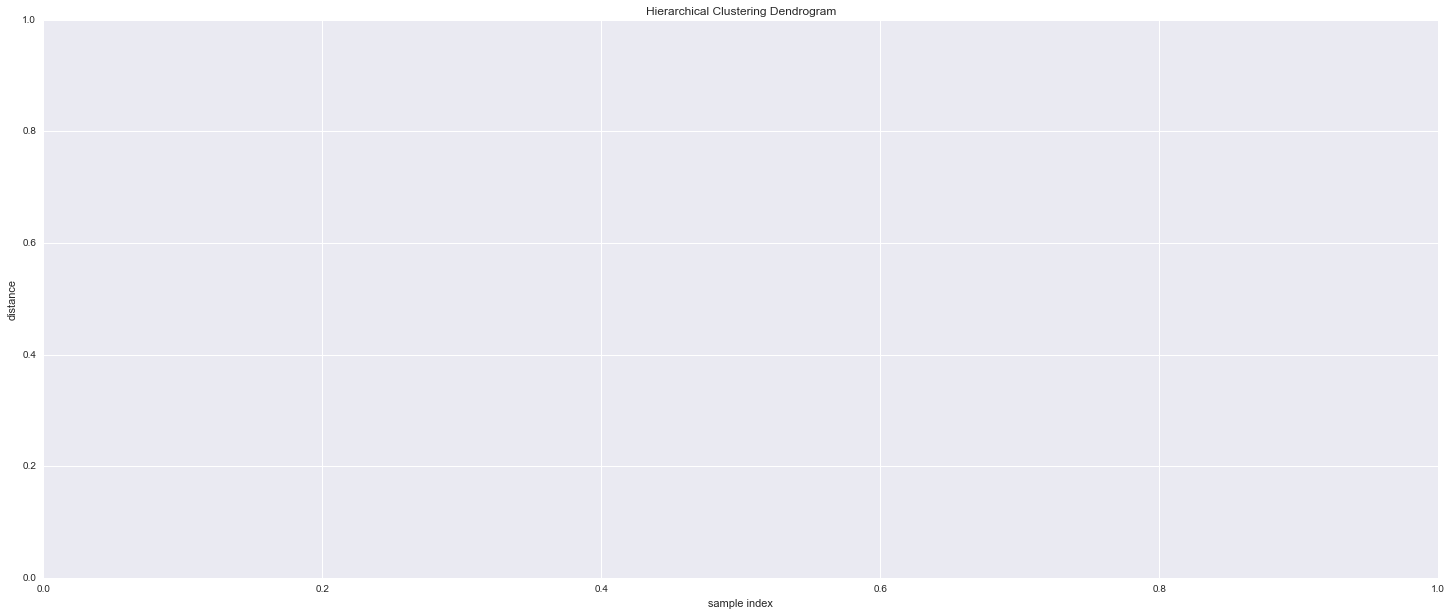

In [23]:
plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z,leaf_rotation=90., leaf_font_size=8.)
plt.show()